# 서울시 범죄 현황

In [1]:
import numpy as np
import pandas as pd

### 지역(구)별 범죄발생현황 데이터 취합

In [2]:
crimes = pd.read_csv('./data/crimes.csv', delimiter='\t', header=1, thousands=',', encoding='utf8')
crimes.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [3]:
crimes.rename(columns={crimes.columns[0] : '기간', crimes.columns[1] : '구별', crimes.columns[2] : '발생 합계', crimes.columns[3] : '검거 합계', crimes.columns[4] : '살인 발생', crimes.columns[5] : '살인 검거', crimes.columns[6] : '강도 발생', crimes.columns[7] : '강도 검거', crimes.columns[8] : '강간 발생', crimes.columns[9] : '강간 검거', crimes.columns[10] : '절도 발생', crimes.columns[11] : '절도 검거', crimes.columns[12] : '폭력 발생', crimes.columns[13] : '폭력 검거'}, inplace=True)
crimes.head()

,기간,구별,발생 합계,검거 합계,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [4]:
crimes.drop([0], inplace=True)
del crimes['기간']
del crimes['발생 합계']
del crimes['검거 합계']
crimes.head()

,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
1,종로구,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3,3,3,4,272,237,999,544,2036,1823
4,성동구,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4,5,6,5,273,213,1875,1008,1853,1585


In [5]:
crime_anal = pd.pivot_table(crimes, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,562,666,6,5,3,5,1339,2970,3159,3658
강동구,155,180,14,15,5,6,907,1650,1874,2163
강북구,145,176,2,3,6,6,664,1229,2206,2424
강서구,257,306,4,3,9,8,1077,2050,2196,2557
관악구,335,408,11,10,10,13,1085,2223,2369,2674


In [6]:
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3658,84.384384,120.000000,60.000000,45.084175,86.358666
강동구,180,15,6,1650,2163,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,176,3,6,1229,2424,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,306,3,8,2050,2557,83.986928,133.333333,112.500000,52.536585,85.881893
관악구,408,10,13,2223,2674,82.107843,110.000000,76.923077,48.807917,88.593867


In [7]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3658,84.384384,100.000000,60.000000,45.084175,86.358666
강동구,180,15,6,1650,2163,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,176,3,6,1229,2424,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,306,3,8,2050,2557,83.986928,100.000000,100.000000,52.536585,85.881893
관악구,408,10,13,2223,2674,82.107843,100.000000,76.923077,48.807917,88.593867


In [8]:
crime_anal.rename(columns= {'강간 발생':'강간', '강도 발생':'강도', '살인 발생':'살인', '절도 발생':'절도', '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3658,84.384384,100.000000,60.000000,45.084175,86.358666
강동구,180,15,6,1650,2163,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,176,3,6,1229,2424,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,306,3,8,2050,2557,83.986928,100.000000,100.000000,52.536585,85.881893
관악구,408,10,13,2223,2674,82.107843,100.000000,76.923077,48.807917,88.593867


In [9]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns= col, index= crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867


In [10]:
result_cctv = pd.read_csv('./data/CCTV_result.csv', encoding='utf8', index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_cctv[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985


In [11]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,3.619048
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,2.353197
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,1.403221
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,2.226830
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,3.448007


In [12]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,3.619048,375.827225
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,2.353197,404.386402
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,1.403221,394.087296
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,2.226830,422.405406
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,3.448007,396.432704
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581,1.680980,400.652278
구로구,0.236111,0.142857,0.750000,0.516514,0.545604,73.008850,100.000000,90.000000,50.365344,84.169279,435751,3227,2.191086,397.543473
금천구,0.109375,0.642857,0.416667,0.168349,0.228020,82.352941,60.000000,100.000000,53.154710,89.376054,249641,1634,1.565267,384.883706
노원구,0.163194,0.142857,0.250000,0.324771,0.509449,85.869565,100.000000,100.000000,45.460614,85.957792,529532,1906,1.390272,417.287972


### 데이터 분석

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

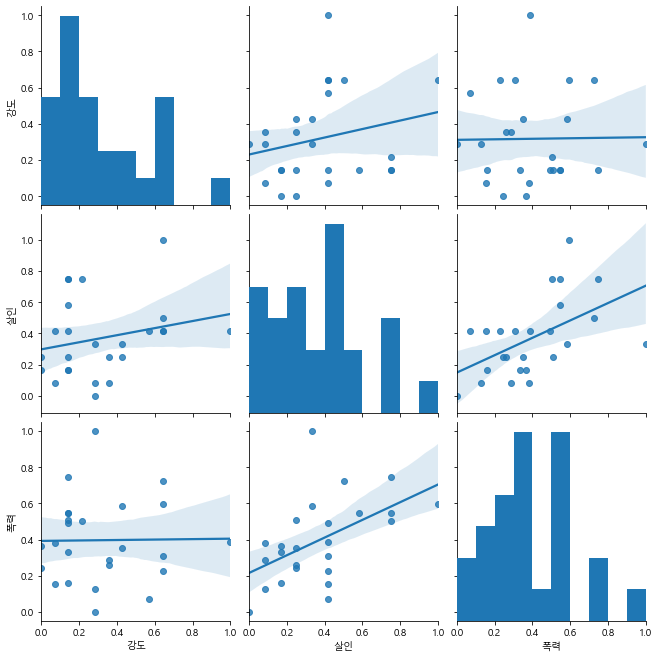

In [14]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', size=3)
plt.show()

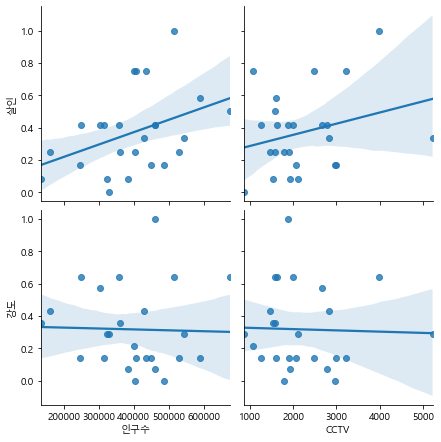

In [15]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인', '강도'], kind='reg', size=3)
plt.show()

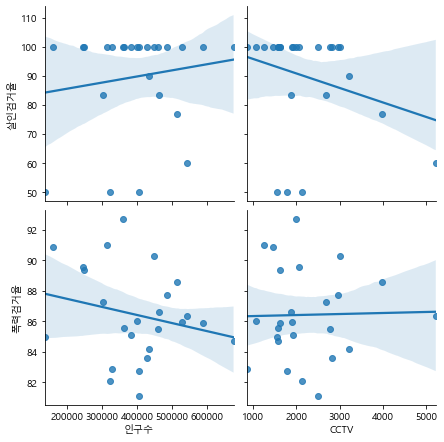

In [16]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '폭력검거율'], kind='reg', size=3)
plt.show()

In [17]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.0,100.0,70.561056,90.874159,159842,1471,1.620591,100.000000
은평구,0.180556,0.000000,0.166667,0.355505,0.366886,83.505155,100.0,100.0,62.428115,87.718470,485842,2962,1.069613,93.978900
성북구,0.149306,0.142857,0.166667,0.133945,0.159819,73.863636,100.0,100.0,67.560074,90.266584,449871,3003,0.752594,93.553825
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.0,100.0,54.454454,89.538310,244953,2063,1.054975,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,92.222222,100.0,100.0,49.873418,82.843137,329300,858,0.285714,92.090669


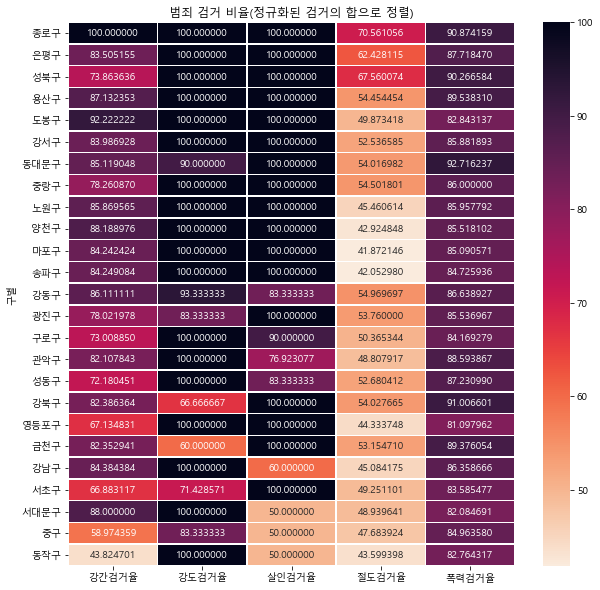

In [18]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10, 10))
cmap = sns.cm.rocket_r
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap=cmap)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

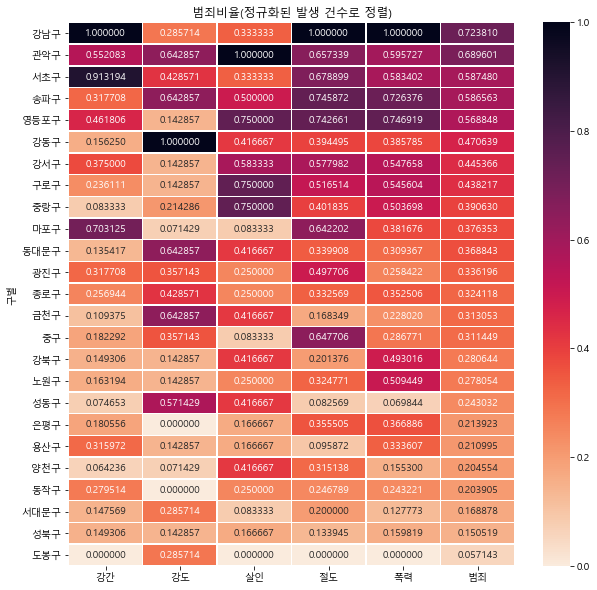

In [19]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10, 10))
cmap = sns.cm.rocket_r
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap=cmap)
plt.title('범죄비율(정규화된 발생 건수로 정렬)')
plt.show()

In [20]:
crime_anal_norm.to_csv('./data/crime_in_Seoul.csv', sep=',', encoding='utf8')

### 지도에 표시하기

In [21]:
import folium

In [22]:
import json
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data= geo_str, data= crime_anal_norm['살인'], columns= [crime_anal_norm.index, crime_anal_norm['살인']], fill_color= 'PuRd', key_on= 'feature.id')
map

In [24]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data= geo_str, data= crime_anal_norm['강간'], columns= [crime_anal_norm.index, crime_anal_norm['강간']], fill_color= 'PuRd', key_on= 'feature.id')
map

In [25]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data= geo_str, data= crime_anal_norm['범죄'], columns= [crime_anal_norm.index, crime_anal_norm['범죄']], fill_color= 'PuRd', key_on= 'feature.id')
map

In [26]:
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data= geo_str, data= tmp_criminal, columns= [crime_anal.index, tmp_criminal], fill_color= 'PuRd', key_on= 'feature.id')
map

### 경찰서 위치(위도, 경도)정보 가져오기

In [27]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin

In [28]:
url = 'https://www.police.go.kr/user/bbs/BD_selectBbsList.do?q_bbsCode=1038&q_tab=1'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [29]:
station_list = soup.select_one('.col-md-9')
tbody = station_list.find('tbody')
trs = tbody.find_all('tr')
names = []; addrs = []
for tr in trs:
    tds = tr.find_all('td')
    st_nm = tds[0].get_text()
    st_addr = tds[1].get_text().rstrip(' ')
    names.append(st_nm); addrs.append(st_addr)
police_loc = pd.DataFrame({
    '관서명': names,
    '주소': addrs
})
police_loc.drop([0], inplace=True)
police_loc.head()

,관서명,주소
1,서울강남경찰서,서울시 강남구 테헤란로 114길 11
2,서울강동경찰서,서울시 강동구 성내로 57
3,서울강북경찰서,서울시 강북구 오패산로 406
4,서울강서경찰서,서울시 양천구 화곡로 73
5,서울관악경찰서,서울시 관악구 관악로5길 33


In [30]:
import requests
from urllib.parse import urlparse, quote

In [31]:
key_fd = open('../06. RestAPI/kakaokey.txt', mode='r')
kakao_key = key_fd.read(100)
key_fd.close()

In [32]:
lat_list = []; lng_list = []
for i in range(1, 32):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(police_loc['주소'][i])
    result = requests.get(url, headers={"Authorization": 'KakaoAK '+kakao_key}).json()
    lng = float(result['documents'][0]['x'])
    lat = float(result['documents'][0]['y'])
    lat_list.append(lat)
    lng_list.append(lng)
police_loc['lat'] = lat_list
police_loc['lng'] = lng_list
police_loc.head()

,관서명,주소,lat,lng
1,서울강남경찰서,서울시 강남구 테헤란로 114길 11,37.509367,127.067100
2,서울강동경찰서,서울시 강동구 성내로 57,37.528678,127.126957
3,서울강북경찰서,서울시 강북구 오패산로 406,37.637170,127.027042
4,서울강서경찰서,서울시 양천구 화곡로 73,37.539801,126.829982
5,서울관악경찰서,서울시 관악구 관악로5길 33,37.474234,126.951870


### 관서별 검거율 가져오기

In [33]:
ar_cr = pd.read_csv('./data/arrested_criminal.csv', encoding='CP949')
ar_cr.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,4
3,중부,강도,검거,4
4,중부,강간,발생,127


In [34]:
ar_cr.reset_index().set_index('구분')
ar_cr.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,4
3,중부,강도,검거,4
4,중부,강간,발생,127


In [35]:
arrested = pd.pivot_table(ar_cr, index=['구분'], values=['건수'], columns=['죄종', '발생검거'])
arrested.head()

건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    411  496   3   3   2   3   878  2003  1877  2182
강동    155  180  14  15   5   6   907  1650  1873  2161
강북    145  176   2   3   6   6   664  1229  2204  2422
강서    257  306   4   3   9   8  1077  2050  2192  2555
관악    335  408  11  10  10  13  1085  2223  2363  2667

In [36]:
arrested.to_csv('arrests.csv')

In [37]:
arrest_table = pd.read_csv('arrests.csv', header=3)
arrest_table.rename(columns={arrest_table.columns[0]: '관서명', arrest_table.columns[1]: '강간검거', arrest_table.columns[2]: '강간발생', arrest_table.columns[3]: '강도검거', arrest_table.columns[4]: '강도발생', arrest_table.columns[5]: '살인검거', arrest_table.columns[6]: '살인발생', arrest_table.columns[7]: '절도검거', arrest_table.columns[8]: '절도발생', arrest_table.columns[9]: '폭력검거', arrest_table.columns[10]: '폭력발생'}, inplace=True)
arrest_table.head()

,관서명,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
0,강남,411,496,3,3,2,3,878,2003,1877,2182
1,강동,155,180,14,15,5,6,907,1650,1873,2161
2,강북,145,176,2,3,6,6,664,1229,2204,2422
3,강서,257,306,4,3,9,8,1077,2050,2192,2555
4,관악,335,408,11,10,10,13,1085,2223,2363,2667


In [38]:
for i in arrest_table.index:
    arrest_table['관서명'][i] = '서울'+arrest_table['관서명'][i]+'경찰서'
arrest_table.head()

,관서명,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
0,서울강남경찰서,411,496,3,3,2,3,878,2003,1877,2182
1,서울강동경찰서,155,180,14,15,5,6,907,1650,1873,2161
2,서울강북경찰서,145,176,2,3,6,6,664,1229,2204,2422
3,서울강서경찰서,257,306,4,3,9,8,1077,2050,2192,2555
4,서울관악경찰서,335,408,11,10,10,13,1085,2223,2363,2667


In [39]:
col = ['살인검거', '강도검거', '강간검거', '절도검거', '폭력검거']
tmp = arrest_table[col] / arrest_table[col].max()

arrest_table['검거'] = np.sum(tmp, axis=1)

arrest_table.head()

,관서명,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,검거
0,서울강남경찰서,411,496,3,3,2,3,878,2003,1877,2182,2.949548
1,서울강동경찰서,155,180,14,15,5,6,907,1650,1873,2161,3.446503
2,서울강북경찰서,145,176,2,3,6,6,664,1229,2204,2422,2.571989
3,서울강서경찰서,257,306,4,3,9,8,1077,2050,2192,2555,3.659342
4,서울관악경찰서,335,408,11,10,10,13,1085,2223,2363,2667,4.521222


In [44]:
police_loc['검거'] = list(arrest_table['검거'])
pol_dist = []
for i in police_loc.index:
    pol_dist.append(police_loc['주소'][i].split()[1])
police_loc['구별'] = pol_dist
police_loc.to_csv('./data/pol_cov.csv')
police_loc.head()

,관서명,주소,lat,lng,검거,구별
1,서울강남경찰서,서울시 강남구 테헤란로 114길 11,37.509367,127.067100,2.949548,강남구
2,서울강동경찰서,서울시 강동구 성내로 57,37.528678,127.126957,3.446503,강동구
3,서울강북경찰서,서울시 강북구 오패산로 406,37.637170,127.027042,2.571989,강북구
4,서울강서경찰서,서울시 양천구 화곡로 73,37.539801,126.829982,3.659342,양천구
5,서울관악경찰서,서울시 관악구 관악로5길 33,37.474234,126.951870,4.521222,관악구


### 데이터 취합 후 지도에 표시하기

In [41]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in police_loc.index:
    folium.Marker([police_loc['lat'][n], police_loc['lng'][n]]).add_to(map)
map

In [42]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in police_loc.index:
    folium.CircleMarker([police_loc['lat'][n], police_loc['lng'][n]], radius=police_loc['검거'][n] * 10, color='#3186cc', fill_color='#3186cc').add_to(map)

map

In [43]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data= geo_str, data= crime_anal_norm['범죄'], columns= [crime_anal_norm.index, crime_anal_norm['범죄']], fill_color= 'PuRd', key_on= 'feature.id')

for n in police_loc.index:
    folium.CircleMarker([police_loc['lat'][n], police_loc['lng'][n]], radius=police_loc['검거'][n] * 10, color='#3186cc', fill_color='#3186cc').add_to(map)

map